In [1]:
import ROOT
import numpy as np
from matplotlib import pyplot as plt
import array
import os, sys
from multiprocessing import Pool
from matplotlib import rcParams
%jsroot on
rcParams['axes.titlepad'] = 20 

rate, efficiency = np.loadtxt("MVA-points.txt", unpack = True)
ROOT.gInterpreter.ProcessLine(".L LoopLineShape.cpp")
ROOT.gInterpreter.ProcessLine(".L ScanAnalysis.cpp")

Welcome to JupyROOT 6.28/06


0

## GENERATE THE DATA

In [ ]:
# DATA GENERATION
simulationCPP = "LoopLineShape"
mvaScan = "\"true\""
ConfFile = "\"ToyConfiguration.txt\""
Nfiles = "1000"

def replace_line(file_name, line_num, text):
    lines = open(file_name, 'r').readlines()
    lines[line_num] = text
    out = open(file_name, 'w')
    out.writelines(lines)
    out.close()

def generate(i):
    CosmicRate = str(rate[i])
    Efficiency = str(efficiency[i])
    folder = "mva_" + str(i)
    if not os.path.exists(folder):	# Check if the folder exist
        os.makedirs(folder)	# Create the folder
    code = simulationCPP + "(" + Nfiles + ",\"" + folder + "/\"," + mvaScan + "," + CosmicRate + "," + Efficiency + "," + ConfFile + ")"
    print("running: ", code)
    ROOT.LoopLineShape(int(Nfiles),folder + "/","true", rate[i], efficiency[i],"ToyConfiguration.txt")
    os.popen("cp ToyConfiguration.txt " + folder + "/"  + "ToyConfiguration.txt")	

# Paraller generation of the data
njob = 7
indexes = range(0,len(rate))
for i in range(0, int(len(rate)/njob)):
    #Create list of point to be generated
    start = i*njob
    stop = (i+1)*njob
    index = np.asarray(indexes[start:stop])
    print("Generating MVA points: ", index)
    if __name__ == "__main__":
        # Generate Files
        with Pool(processes = njob, maxtasksperchild = 1) as pool:
            pool.map(generate, index)
    # Create list of last points to be generated
    if (i == (int(len(rate)/njob) - 1) and (len(rate))%njob != 0):
        start = (i+1)*njob
        stop = start + len(rate)%njob
        index = np.asarray(indexes[start:stop])
        print("generating last points: " , index)
        # Generate last points
        if __name__ == "__main__":
            with Pool(processes = njob, maxtasksperchild = 1) as pool:
                pool.map(generate, index)
for i in range(0,len(rate)):
    folder = "mva_" + str(i)
    replace_line(folder + "/ToyConfiguration.txt", 17, "CosmicRate = %f\n" % (rate[i]))
    replace_line(folder + "/ToyConfiguration.txt", 18, "Efficiency = %f\n" % (efficiency[i]))

## ANALYZE THE DATA

In [ ]:
# Threshold
bias_thr = np.array([])
devStandard_thr = np.array([])
onset_thr = np.array([])
onset2_thr = np.array([])
bias_thr_bk = np.array([])
devStandard_thr_bk = np.array([])
onset_thr_bk = np.array([])
onset2_thr_bk = np.array([])
# Constant Fraction
bias_cf = np.array([])
devStandard_cf = np.array([])
onset_cf = np.array([])
onset2_cf = np.array([])
bias_classic = np.array([])
devStandard_classic = np.array([])
onset_classic = np.array([])
onset2_classic = np.array([])
# forward 2017
bias_fw = np.array([])
devStandard_fw = np.array([])
onset_fw = np.array([])
onset2_fw = np.array([])
bias_fw_bk = np.array([])
devStandard_fw_bk = np.array([])
onset_fw_bk = np.array([])
onset2_fw_bk = np.array([])
# Reversed 2017
bias_rev = np.array([])
devStandard_rev = np.array([])
onset_rev = np.array([])
onset2_rev = np.array([])
bias_rev_bk = np.array([])
devStandard_rev_bk = np.array([])
onset_rev_bk = np.array([])
onset2_rev_bk = np.array([])

# Sum Neighbors 
bias_sum = np.array([])
devStandard_sum = np.array([])
onset_sum = np.array([])
onset2_sum = np.array([])
# Running Difference
bias_runningDiff = np.array([])
devStandard_runningDiff = np.array([])
onset_runningDiff = np.array([])
onset2_runningDiff = np.array([])
# Hybrid method
bias_hybrid = np.array([])
devStandard_hybrid = np.array([])
onset_hybrid = np.array([])
onset2_hybrid = np.array([])

# DATA ANALYSIS
folder = "scanMvaData/mva_"
trial = 50

#Parameters of the algorithms
Nsigma = 5
Nfilter = 3
fraction = 30/100
Nthr = 3
Nfw1 = 1
Nfw2 = 2

for i in range(0, len(rate)):
    folder2 = "Plot/mva_" + str(i)
    if not os.path.exists(folder2):	# Check if the folder exist
        os.makedirs(folder2)	# Create the folder

def task(i):
	values = ROOT.ScanAnalysis(folder + str(i) + "/", folder +  str(i) + "/ToyConfiguration.txt",0,trial,Nthr,fraction, Nsigma, Nfilter,rate[i], "Plot/mva_" + str(i) + "/")
	npResult = np.asarray(values)
	return npResult

if __name__ == "__main__":
    # create the process pool
    index = range(0,len(rate))
    with Pool(processes = 3, maxtasksperchild = 1) as pool:
        for results in pool.map(task, index):
            bias_thr =     np.append(bias_thr, results[0]);         devStandard_thr = np.append(devStandard_thr, results[1])
            bias_thr_bk =     np.append(bias_thr_bk, results[2]);   devStandard_thr_bk = np.append(devStandard_thr_bk, results[3])
            bias_fw =      np.append(bias_fw, results[4]);          devStandard_fw = np.append(devStandard_fw, results[5])
            bias_fw_bk =      np.append(bias_fw_bk, results[6]);    devStandard_fw_bk = np.append(devStandard_fw_bk, results[7])
            bias_rev =     np.append (bias_rev, results[8]);        devStandard_rev = np.append(devStandard_rev, results[9])
            bias_rev_bk =     np.append (bias_rev_bk, results[10]); devStandard_rev_bk = np.append(devStandard_rev_bk, results[11])
            bias_classic = np.append(bias_classic,results[12]);     devStandard_classic = np.append(devStandard_classic, results[13])
            bias_cf =      np.append (bias_cf, results[14]);        devStandard_cf = np.append(devStandard_cf, results[15])
            bias_sum =     np.append(bias_sum, results[16]);        devStandard_sum = np.append(devStandard_sum, results[17])
            bias_hybrid =  np.append(bias_hybrid,results[18]);      devStandard_hybrid = np.append(devStandard_hybrid,results[19])
            onset_thr = np.append(onset_thr,results[20]);          onset_thr_bk = np.append(onset_thr_bk,results[21])
            onset_fw = np.append(onset_fw,results[22]);            onset_fw_bk = np.append(onset_fw_bk,results[23])
            onset_rev = np.append(onset_rev,results[24]);          onset_rev_bk = np.append(onset_rev_bk,results[25])
            onset_classic = np.append(onset_classic,results[26]);  onset_cf = np.append(onset_cf,results[27])
            onset_sum = np.append(onset_sum,results[28]);          onset_hybrid = np.append(onset_hybrid,results[29])
            
            onset2_thr = np.append(onset2_thr,results[30]);         onset2_thr_bk = np.append(onset2_thr_bk,results[31])
            onset2_fw = np.append(onset2_fw,results[32]);           onset2_fw_bk = np.append(onset2_fw_bk,results[33])
            onset2_rev = np.append(onset2_rev,results[34]);         onset2_rev_bk = np.append(onset2_rev_bk,results[35])
            onset2_classic = np.append(onset2_classic,results[36]); onset2_cf = np.append(onset2_cf,results[37])
            onset2_sum = np.append(onset2_sum,results[38]);         onset2_hybrid = np.append(onset2_hybrid,results[39])
            bias_runningDiff =  np.append(bias_runningDiff,results[40]);      devStandard_runningDiff = np.append(devStandard_runningDiff,results[41])

# PLOT THE DATA

[ 2.40015024  0.70985342  0.24339568  1.02411706  0.11227283  1.12518436
  0.53746776  1.755885    1.37061898  1.29346921  0.07591035  1.30127952
  0.78245544  0.61683569  0.89920123  0.10953951  2.95332541  1.39096413
  0.01644396  0.11180657  0.77813953  2.76320039  2.47799352  2.57539044
  1.5661217   6.20410198 11.09664368  6.50412261  7.65346802 10.75706581
 10.21579557 12.43368846  6.30853008]


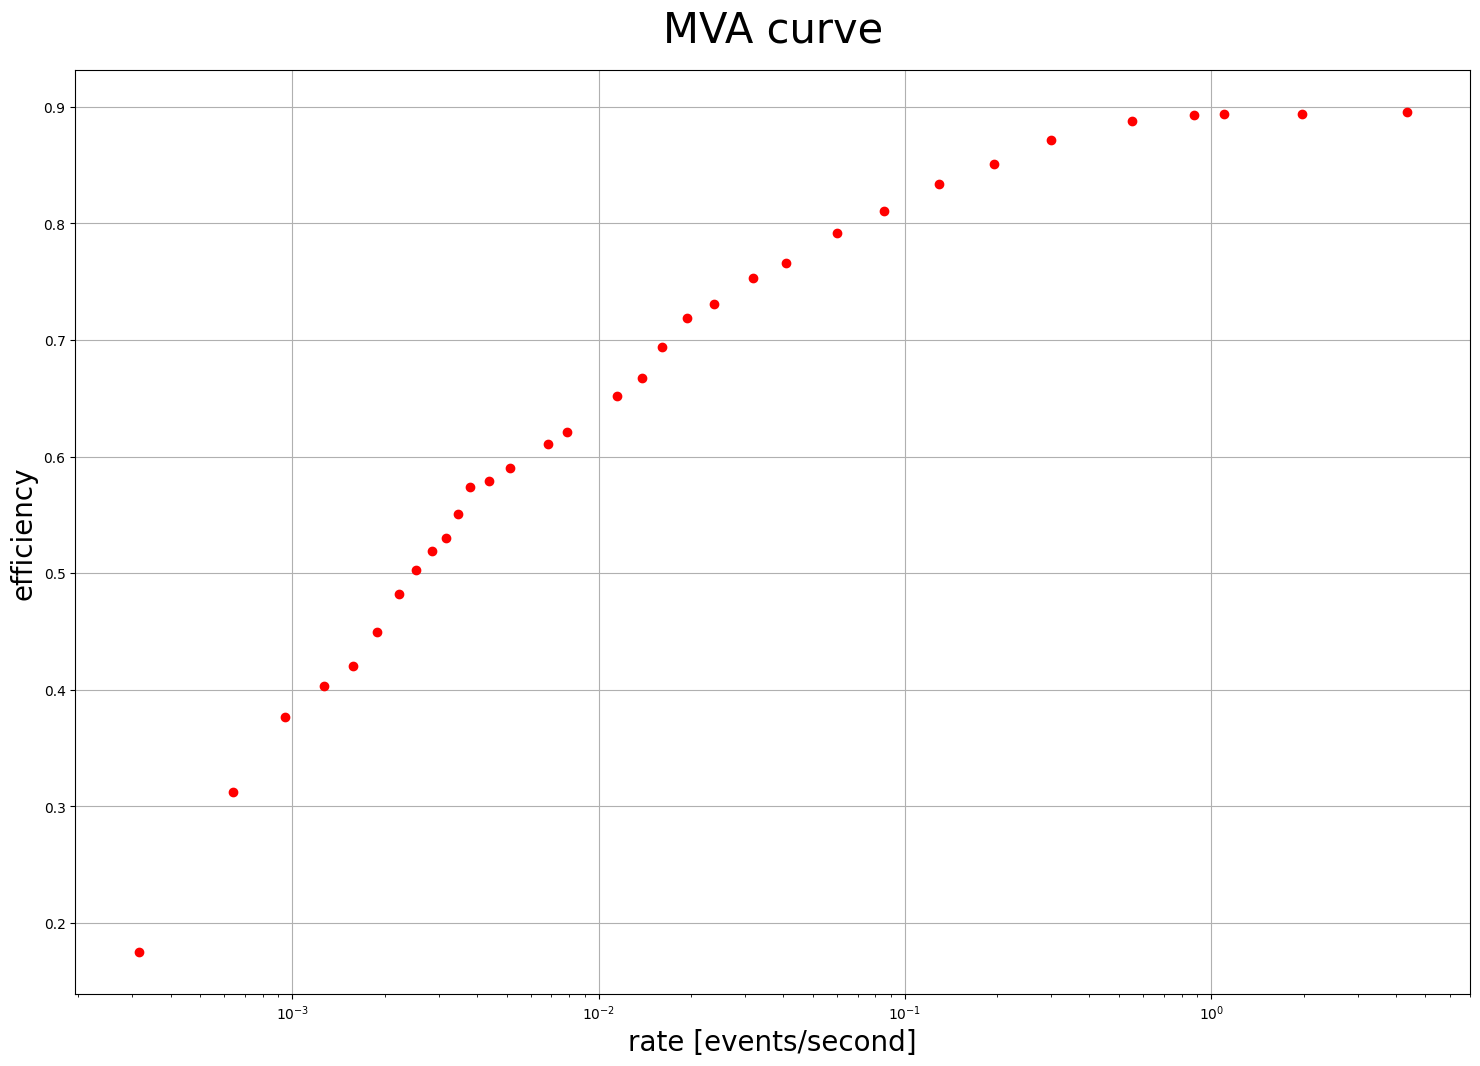

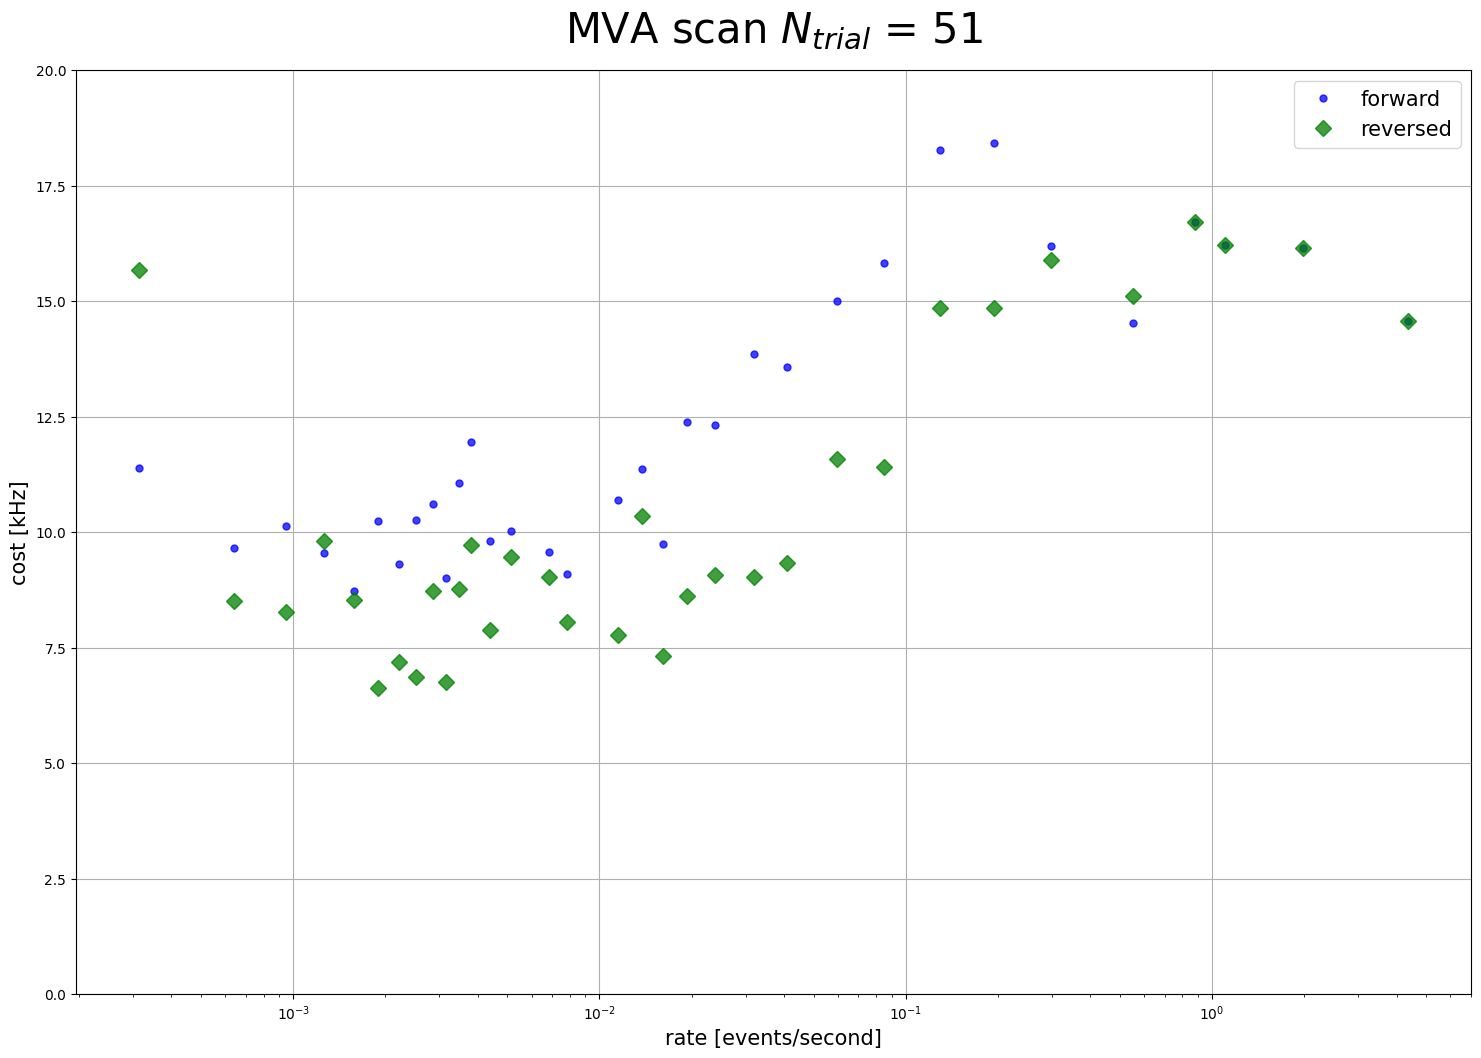

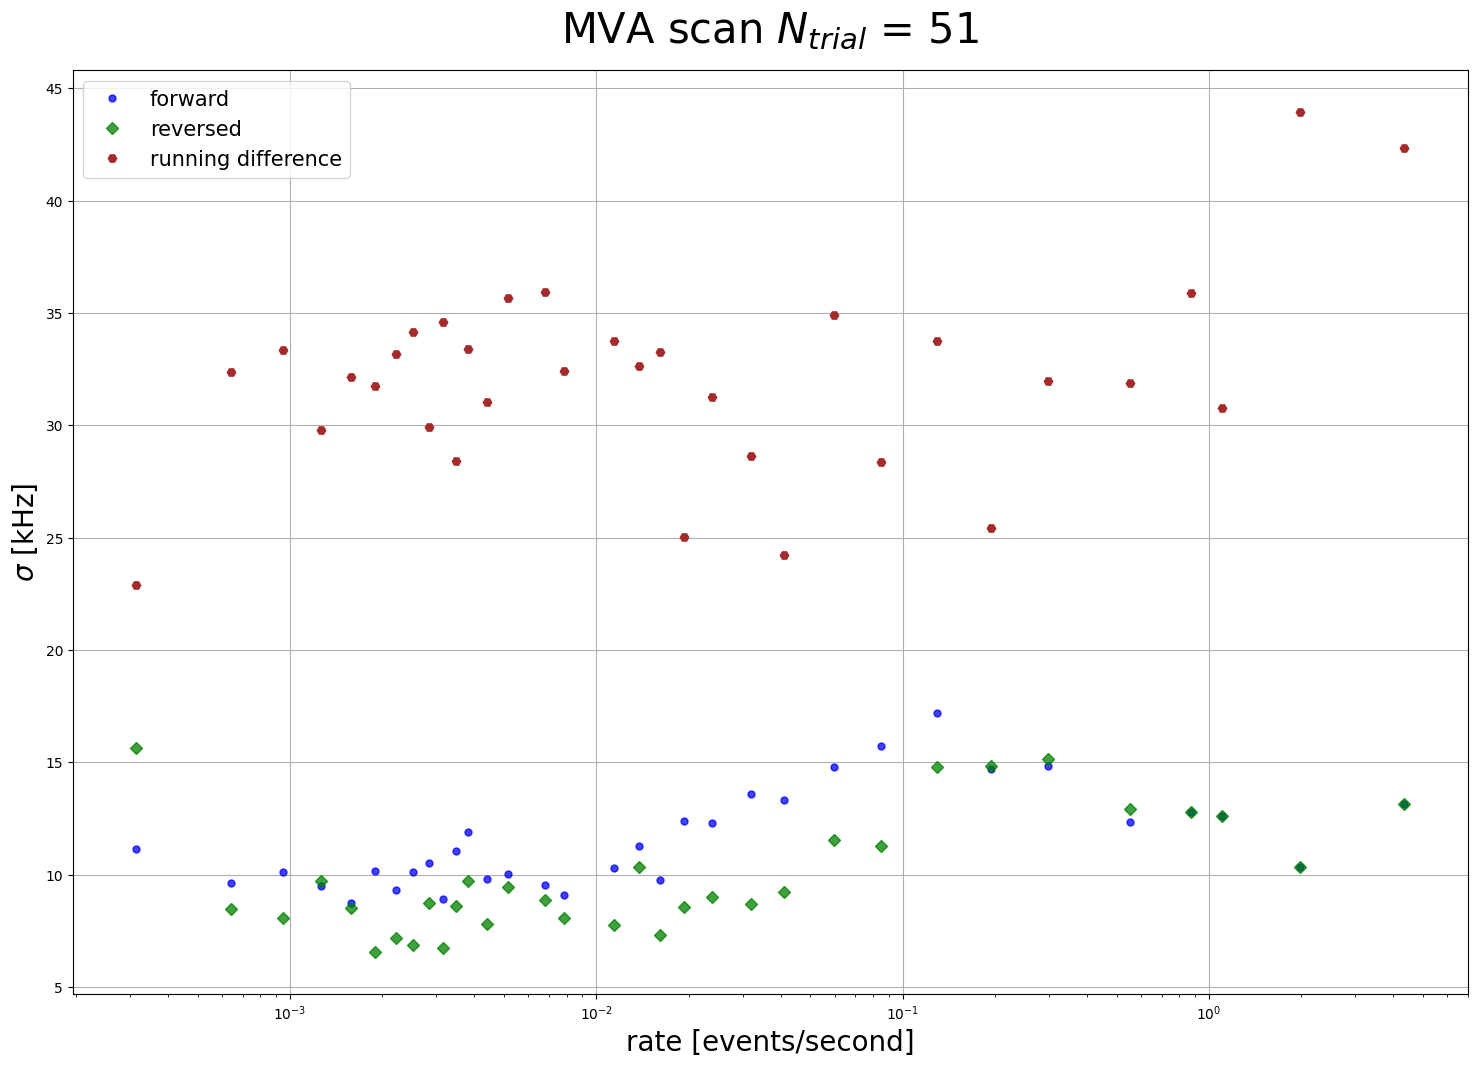

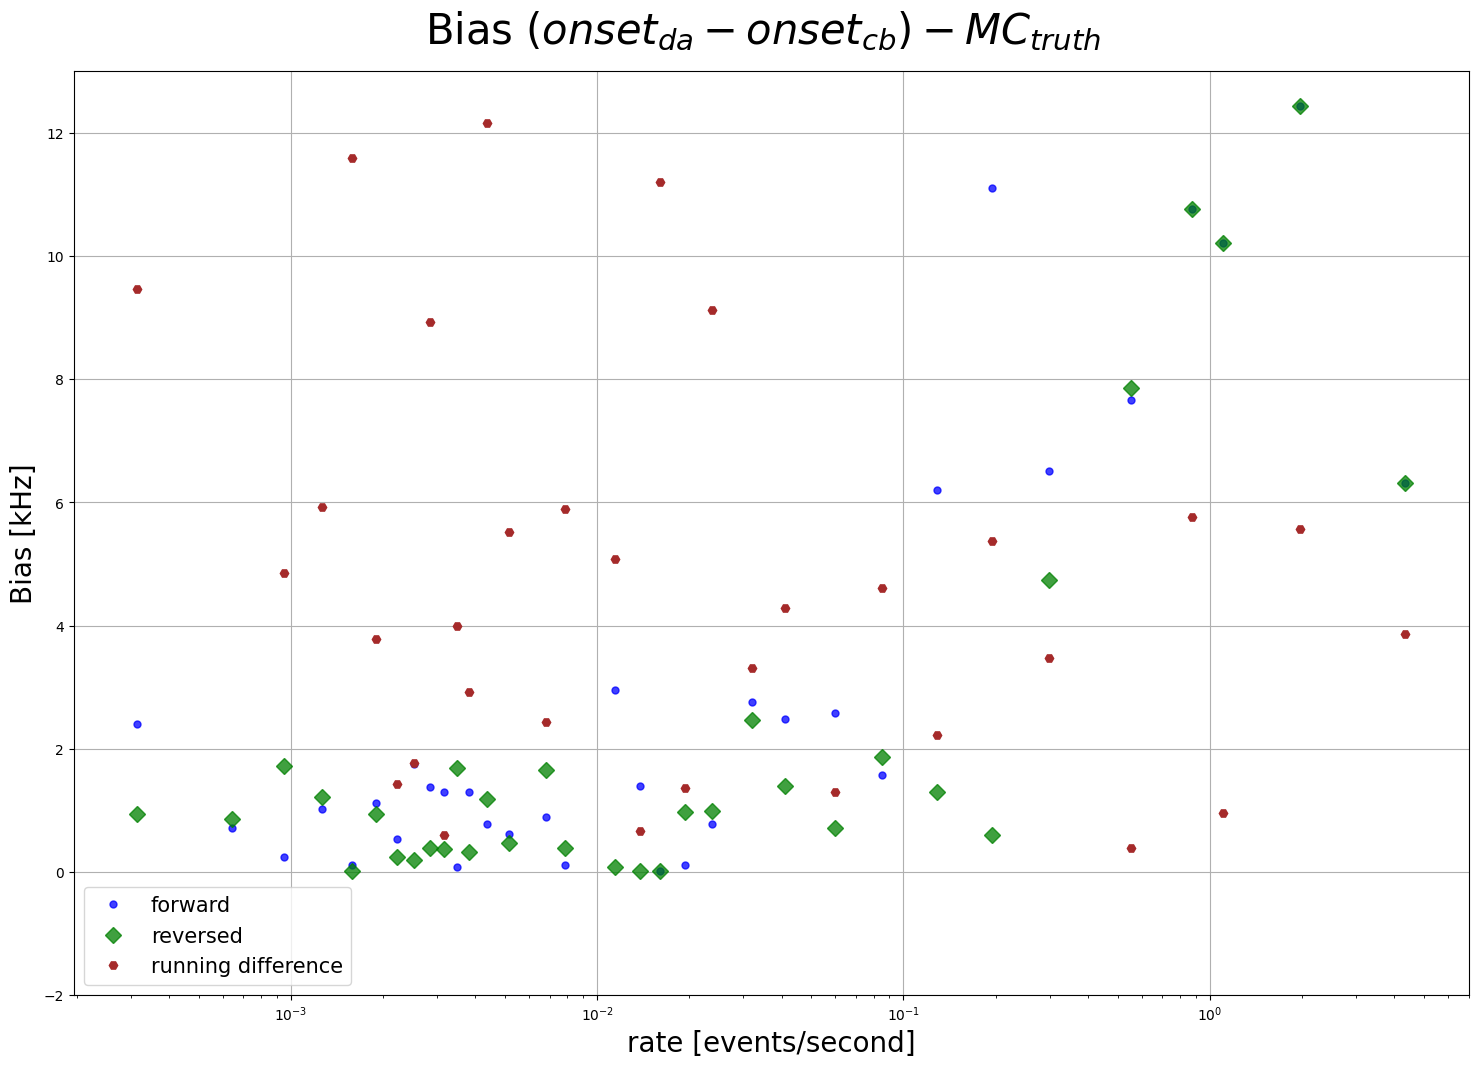

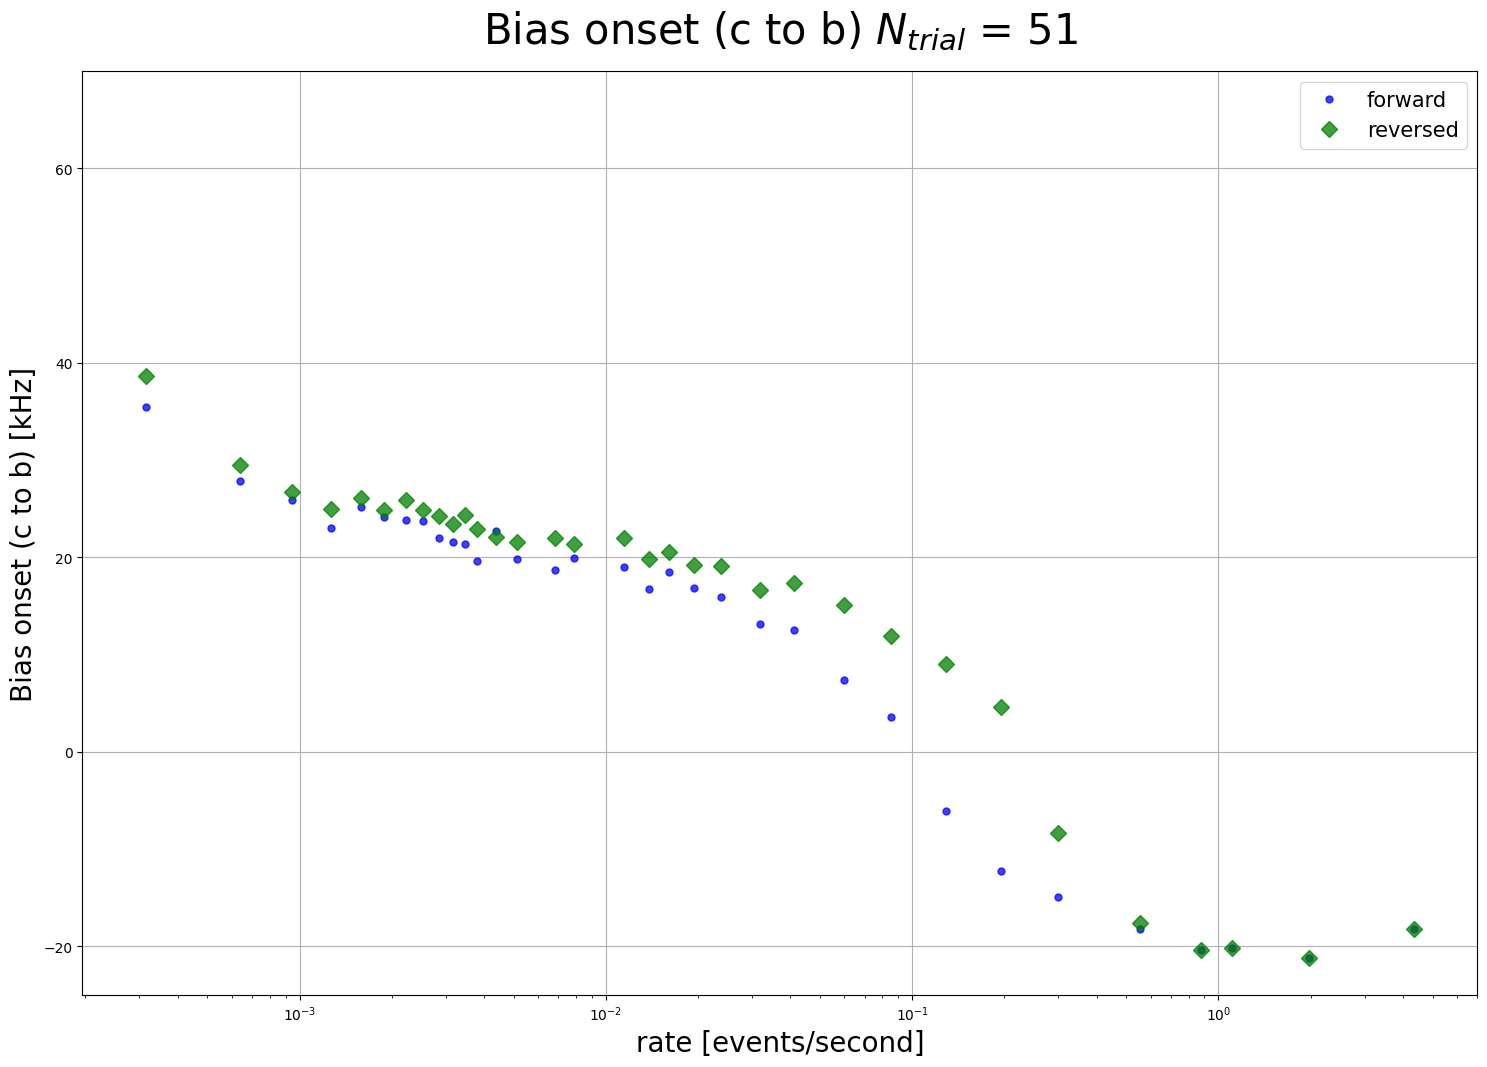

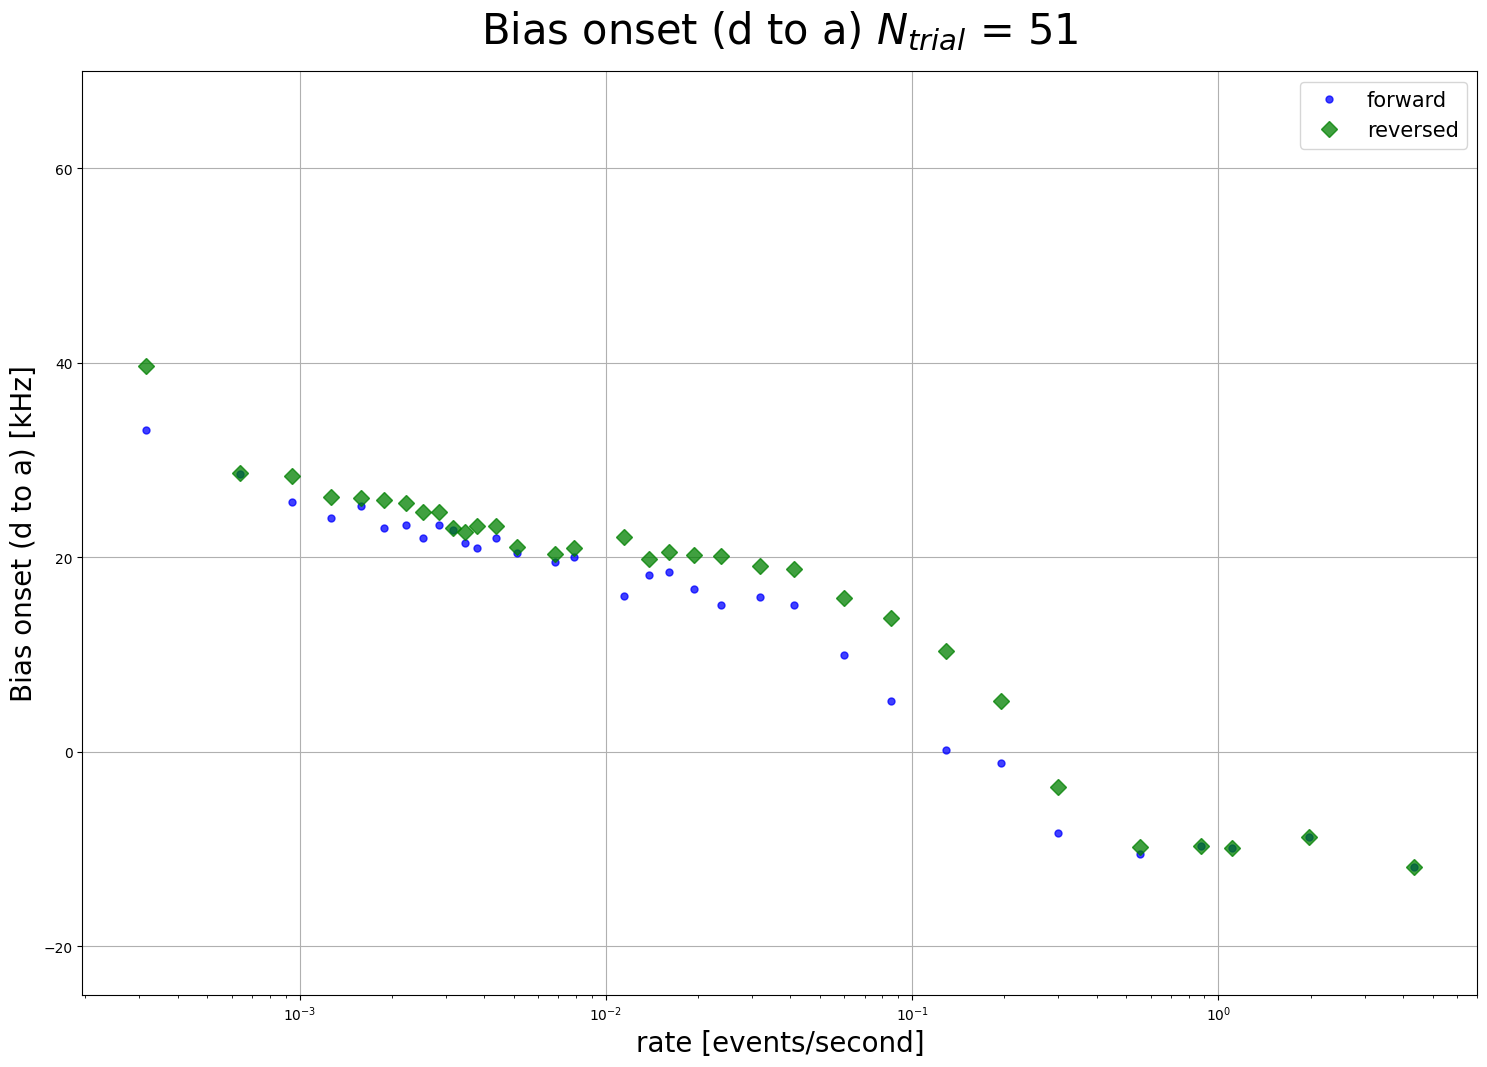

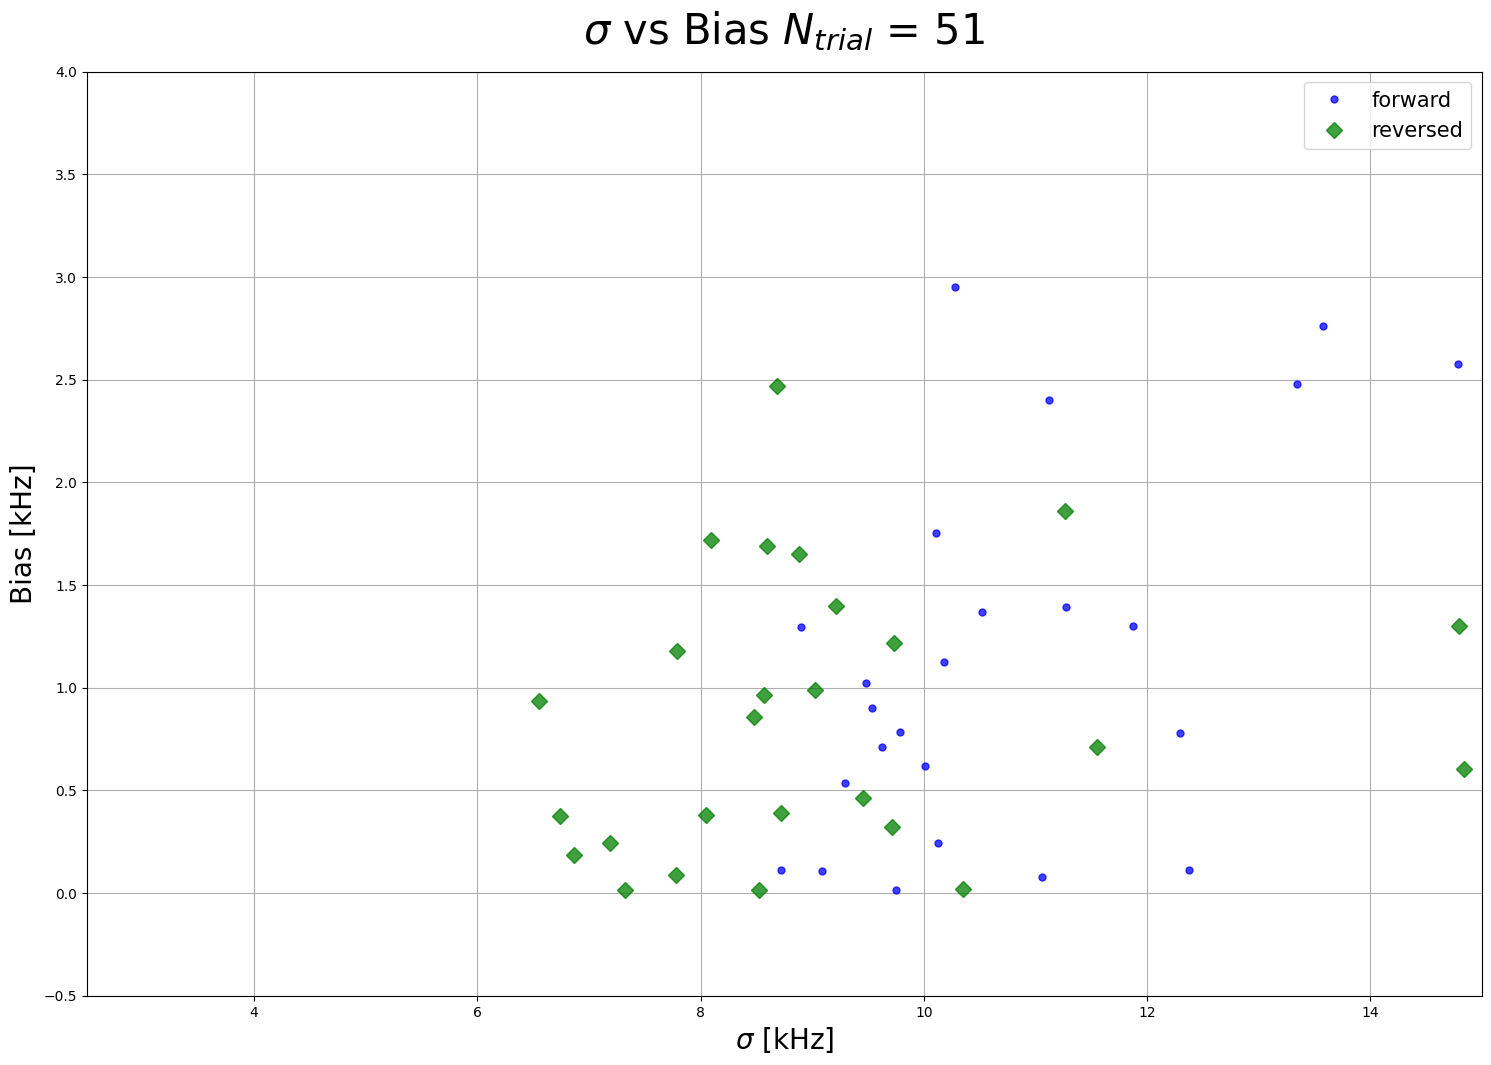

In [3]:
# define a cost function, function of bias and devStandard
def cost(bias,dev):
    # funzione costo : (deviazione standard + bias)**2/deviazione standard
    return np.sqrt((dev**2 + np.abs(bias)**2))

cost_cf = cost(bias_cf,devStandard_cf)	
cost_fw = cost(bias_fw,devStandard_fw)
cost_rev = cost(bias_rev,devStandard_rev)
cost_sum = cost(bias_sum,devStandard_sum)
cost_thr = cost(bias_thr,devStandard_thr)
cost_classic = cost(bias_classic,devStandard_classic)
cost_hybrid = cost(bias_hybrid,devStandard_hybrid)

plt.figure(0, figsize = (18,12))
plt.title("MVA curve", fontsize = 30)
plt.xscale('log')
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel("efficiency", fontsize = 20)
plt.grid()
plt.errorbar(rate, efficiency, linestyle = '', marker = '.', color = 'red', markersize = 12)

plt.figure(1, figsize = (18,12))
plt.title("MVA scan " + r"$N_{trial}$ = " + str(trial + 1) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 15)
plt.ylabel("cost [kHz]", fontsize = 15)
plt.xscale("log")
plt.ylim(0,20)
plt.grid()
#plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$\downarrow$', markersize = 12, label = "PassCut", alpha = 0.75)
#plt.errorbar(rate,cost_cf, linestyle = '',marker = "v", color = "red", label = "constant fraction %.1f " % fraction, alpha = 0.75)
#plt.errorbar(rate, cost_classic, linestyle = '', marker = "v", color = "grey", label = "costant fraction %.1f (without cosmic)" % fraction, alpha = 0.75)
plt.errorbar(rate,cost_fw, linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.75)
plt.errorbar(rate,cost_rev, linestyle = '',marker = "D", color = "green", label = "reversed", markersize = 8,alpha = 0.75)
#plt.errorbar(rate,cost_sum, linestyle = '',marker = "s", color = "black", label = r"Neighbors sum ( > %d$\sigma$)" % Nsigma, alpha = 0.75)
#plt.errorbar(rate,cost_thr, linestyle = '',marker = "d", color = "orange", label = "over Threshold (> 3)", alpha = 0.75)
#plt.errorbar(rate,cost_hybrid, linestyle = '',marker = "h", color = "turquoise", label = "hybrid (fraction %.1f)" % fraction, alpha = 0.75)
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/cost.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/cost.pdf", format = "pdf")

# SIGMA VERSUS RATE
plt.figure(2, figsize = (18,12))
plt.title("MVA scan " + r"$N_{trial}$ = " + str(trial + 1) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$\sigma$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.yticks(np.linspace(0,45,19))
#plt.yticks(np.linspace(-5,40,19))
#plt.ylim(0,20)
#plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$*$', markersize = 12, label = "PassCut", alpha = 0.75)

#plt.errorbar(rate,devStandard_cf, linestyle = '',marker = "v", color = "red", label = "constant fraction %.1f " % fraction, alpha = 0.75)
#plt.errorbar(rate,devStandard_fw_bk, linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 8, alpha = 0.75)
#plt.errorbar(rate, devStandard_rev_bk, linestyle = '',marker = "D", color = "green", label = "reversed", markersize = 8 ,alpha = 0.75)
#plt.errorbar(rate, devStandard_thr_bk, linestyle = '',marker = "d", color = "orange", label = "over Threshold (> 3)", alpha = 0.75)
#plt.errorbar(rate,devStandard_hybrid, linestyle = '',marker = "h", color = "turquoise", label = "hybrid (fraction %.1f)" % fraction, alpha = 0.75)

#plt.errorbar(rate, devStandard_classic, linestyle = '', marker = "v", color = "grey", label = "costant fraction %.1f (without cosmic)" % fraction, alpha = 0.75)
plt.errorbar(rate,devStandard_fw, linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.75)
plt.errorbar(rate, devStandard_rev, linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.75)
#plt.errorbar(rate, devStandard_thr, linestyle = '',marker = "d", color = "orange", label = "over Threshold (> 3)", alpha = 0.75)
#plt.errorbar(rate,devStandard_sum, linestyle = '',marker = "s", color = "black", label = r"Neighbors sum ( > %d$\sigma$)" % Nsigma, alpha = 0.75)
plt.errorbar(rate,devStandard_runningDiff, linestyle = '',marker = "H", color = "brown", label = r"running difference")

plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/sigmaVSrate.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/sigmaVSrate.pdf", format = "pdf")

# BIAS HYPERFINE SPLITTING MEASUREMENT
plt.figure(3, figsize = (18,12))
plt.title(r"Bias $(onset_{da} - onset_{cb}) - MC_{truth}$  ", fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel("Bias [kHz]", fontsize = 20)
plt.xscale("log")
plt.ylim(-2,13)
plt.grid()
#plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$*$', markersize = 12, label = "PassCut", alpha = 0.75)
#plt.errorbar(rate,np.abs(bias_cf), linestyle = '',marker = "v", color = "red", label = "constant fraction %.1f" % fraction, alpha = 0.75)
plt.errorbar(rate,np.abs(bias_fw), linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.75)
plt.errorbar(rate,np.abs(bias_rev), linestyle = '',marker = "D", color = "green", label = "reversed", markersize = 8 ,alpha = 0.75)
#plt.errorbar(rate,np.abs(bias_sum), linestyle = '',marker = "s", color = "black", label = r"Neighbors sum ( > %d$\sigma$)" % Nsigma, alpha = 0.75)
#plt.errorbar(rate,np.abs(bias_thr), linestyle = '',marker = "d", color = "orange", label = "over Threshold (> 3)", alpha = 0.75)
#plt.errorbar(rate,np.abs(bias_hybrid), linestyle = '',marker = "h", color = "turquoise", label = "hybrid (fraction %.1f)" % fraction, alpha = 0.75)
plt.errorbar(rate,np.abs(bias_runningDiff), linestyle = '',marker = "H", color = "brown", label = r"running difference")
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/bias.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/bias.pdf", format = "pdf")
print(np.abs(bias_fw))

#BIAS ONSET C TO B
plt.figure(4, figsize = (18,12))
plt.title("Bias onset (c to b) " + r"$N_{trial}$ = " + str(trial + 1) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel("Bias onset (c to b) [kHz]", fontsize = 20)
plt.xscale("log")
plt.ylim(-25,70)
plt.grid()
#plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$*$', markersize = 12, label = "PassCut", alpha = 0.75)
#plt.errorbar(rate,onset_cf, linestyle = '',marker = "v", color = "red", label = "constant fraction %.1f" % fraction, alpha = 0.75)
#plt.errorbar(rate, onset_classic, linestyle = '', marker = "v", color = "grey", label = "costant fraction %.1f (without cosmic)" % fraction, alpha = 0.75)
plt.errorbar(rate,onset_fw, linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.75)
plt.errorbar(rate,onset_rev, linestyle = '',marker = "D", color = "green", label = "reversed", markersize = 8 ,alpha = 0.75)
#plt.errorbar(rate,onset_sum, linestyle = '',marker = "s", color = "black", label = r"Neighbors sum ( > %d$\sigma$)" % Nsigma, alpha = 0.75)
#plt.errorbar(rate,onset_thr, linestyle = '',marker = "d", color = "orange", label = "over Threshold (> 3)", alpha = 0.75)
#plt.errorbar(rate,onset_hybrid, linestyle = '',marker = "h", color = "turquoise", label = "hybrid (fraction %.1f)" % fraction, alpha = 0.75)
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/onsetBias_cb.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/onsetBias_cb.pdf", format = "pdf")

#BIAS ONSET D TO A
plt.figure(5, figsize = (18,12))
plt.title("Bias onset (d to a) " + r"$N_{trial}$ = " + str(trial + 1) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel("Bias onset (d to a) [kHz]", fontsize = 20)
plt.xscale("log")
plt.ylim(-25,70)
plt.grid()
#plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$*$', markersize = 12, label = "PassCut", alpha = 0.75)
#plt.errorbar(rate,onset2_cf, linestyle = '',marker = "v", color = "red", label = "constant fraction %.1f" % fraction, alpha = 0.75)
#plt.errorbar(rate, onset2_classic, linestyle = '', marker = "v", color = "grey", label = "costant fraction %.1f (without cosmic)" % fraction, alpha = 0.75)
plt.errorbar(rate,onset2_fw, linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.75)
plt.errorbar(rate,onset2_rev, linestyle = '',marker = "D", color = "green", label = "reversed", markersize = 8 ,alpha = 0.75)
#plt.errorbar(rate,onset2_sum, linestyle = '',marker = "s", color = "black", label = r"Neighbors sum ( > %d$\sigma$)" % Nsigma, alpha = 0.75)
#plt.errorbar(rate,onset2_thr, linestyle = '',marker = "d", color = "orange", label = "over Threshold (> 3)", alpha = 0.75)
#plt.errorbar(rate,onset2_hybrid, linestyle = '',marker = "h", color = "turquoise", label = "hybrid (fraction %.1f)" % fraction, alpha = 0.75)
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/onsetBias_da.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/onsetBias_da.pdf", format = "pdf")

plt.figure(6, figsize = (18,12))
plt.title(r"$\sigma$ vs Bias " + r"$N_{trial}$ = " + str(trial + 1) , fontsize = 30)
plt.xlabel(r"$\sigma$ [kHz]", fontsize = 20)
plt.ylabel("Bias [kHz]", fontsize = 20)
plt.grid()
plt.xlim(2.5,15)
plt.ylim(-0.5,4)
#plt.errorbar(devStandard_cf,np.abs(bias_cf), linestyle = '',marker = "v", color = "red", label = "constant fraction %f" % fraction, alpha = 0.75)
plt.errorbar(devStandard_fw,np.abs(bias_fw), linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.75)
plt.errorbar(devStandard_rev,np.abs(bias_rev), linestyle = '',marker = "D", color = "green", label = "reversed",markersize = 8, alpha = 0.75)
#plt.errorbar(devStandard_sum,np.abs(bias_sum), linestyle = '',marker = "s", color = "black", label = r"Neighbors sum ( > %d$\sigma$)" % Nsigma, alpha = 0.75)
#plt.errorbar(devStandard_thr,np.abs(bias_thr), linestyle = '',marker = "d", color = "orange", label = "over Threshold (> 3)", alpha = 0.75)
#plt.errorbar(devStandard_hybrid,np.abs(bias_hybrid), linestyle = '',marker = "h", color = "turquoise", label = "hybrid (fraction %.1f)" % fraction, alpha = 0.75)
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/biasVSsigma.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/biasVSsigma.pdf", format = "pdf")
plt.show()
